Goal : 
- Analize the different steps of the algorithm

- Visualize a simple implementation for 2D data

## Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# 1. Initial data Sampling

In [2]:
#Generate X = 400 samples in a 2D rectangle 10x10
#Generate Y = 40 samples in a 2D rectangle 2x2
X = np.random.rand(400,2)*10
Y = np.random.rand(20,2)*2
 

In [147]:
#create a concat pd dataframe with X and Y and a column 'label' with 0 for X and 1 for Y
X_df = pd.DataFrame(X, columns=['x1','x2'])
Y_df = pd.DataFrame(Y, columns=['x1','x2'])
X_df['label'] = 0
Y_df['label'] = 1
data = pd.concat([X_df,Y_df], axis=0)

<Axes: xlabel='x1', ylabel='x2'>

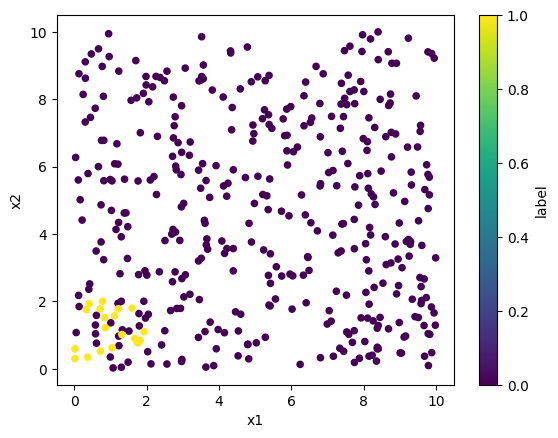

In [148]:
data.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')    

We clearily see that this dataset is imbalanced. Moreover the yellow sample is located in a specific space (bottom left hand corner). Without any over-sampling technique, the model will not not be able to predict the red class.

We will compare different methods. firstly without any over sampling technique, then random over sampling and finally with the SMOTE technique.

For these three methods, we will compare variance in the red samples, then decision boundary and the confusion matrix for a classification model. 

# 2. Visualization of the different samples techniques

## 2.1. Without Over Sampling 

<Axes: xlabel='x1', ylabel='x2'>

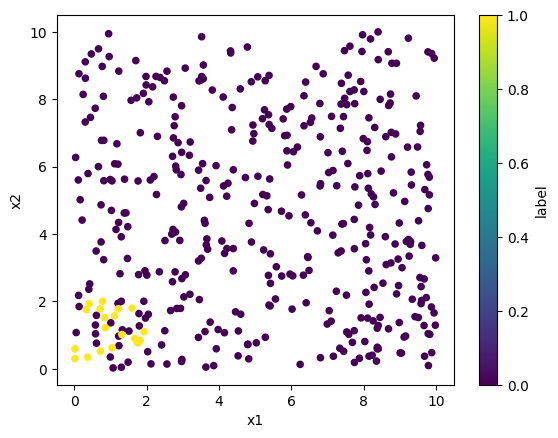

In [188]:
data.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')    

## 2.2. Random Over Sampling 

<Axes: xlabel='x1', ylabel='x2'>

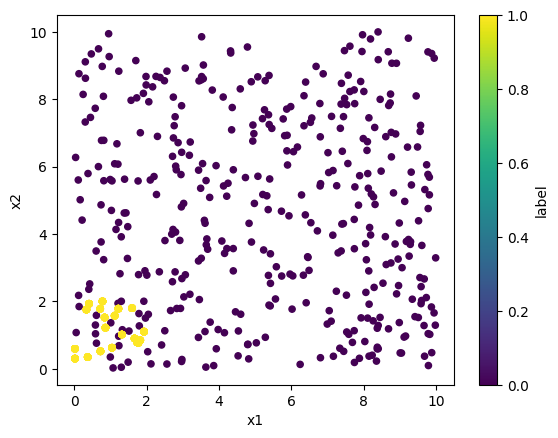

In [150]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data[['x1','x2']], data['label'])
data_resampled = pd.DataFrame(X_resampled, columns=['x1','x2'])
data_resampled['label'] = y_resampled
data_resampled.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

Of course, we don't see any difference visual difference because random over sampling is replicating red samples.

## 2.3. SMOTE 

<Axes: xlabel='x1', ylabel='x2'>

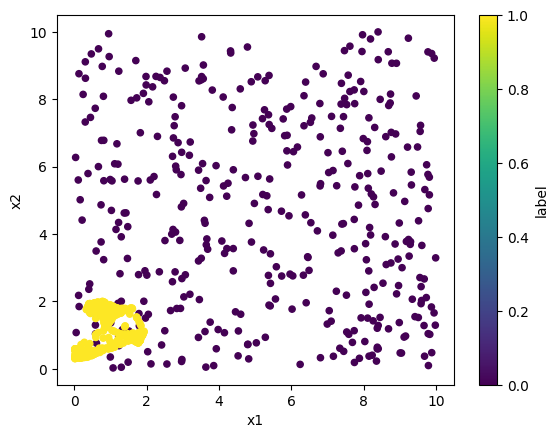

In [152]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(data[['x1','x2']], data['label'])
data_smote = pd.DataFrame(X_resampled, columns=['x1','x2'])
data_smote['label'] = y_resampled
data_smote.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

# 3. Variance Comparison 

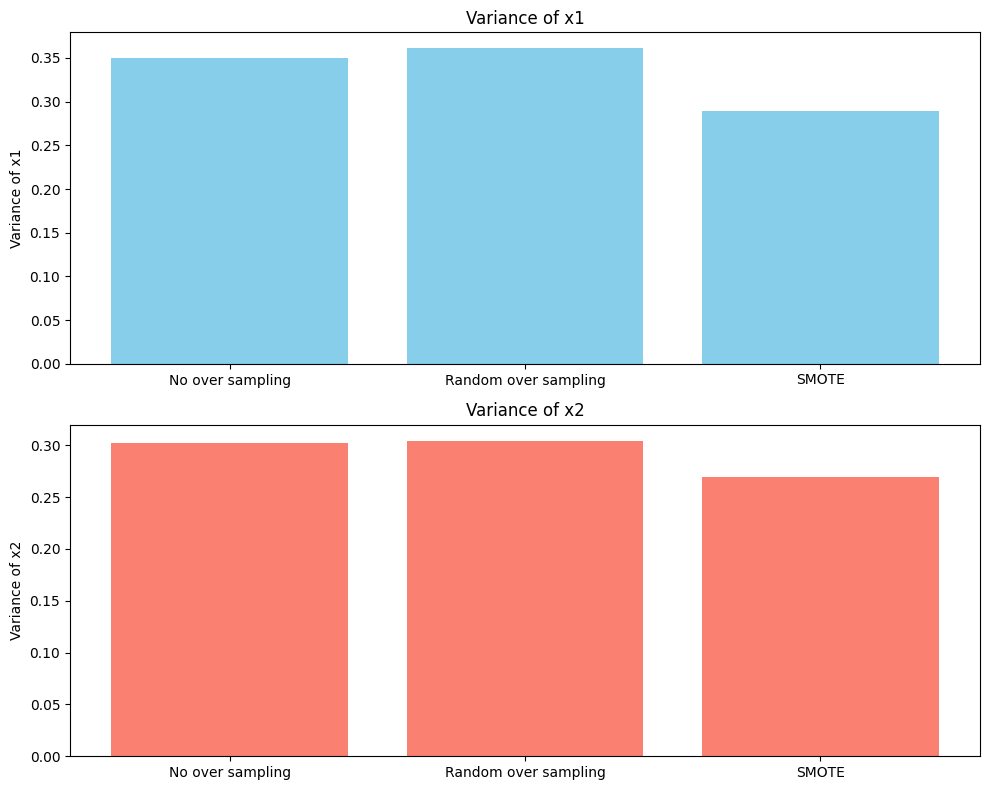

In [154]:
# Calculate variances
variance_x1 = [np.var(data[data['label'] == 1]['x1']), np.var(data_resampled[data_resampled['label'] == 1]['x1']), np.var(data_smote[data_smote['label'] == 1]['x1'])]
variance_x2 = [np.var(data[data['label'] == 1]['x2']), np.var(data_resampled[data_resampled['label'] == 1]['x2']), np.var(data_smote[data_smote['label'] == 1]['x2'])]

# Plotting
labels = ['No over sampling', 'Random over sampling', 'SMOTE']
x = np.arange(len(labels))

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot for variance of x1
ax[0].bar(x, variance_x1, color='skyblue')
ax[0].set_ylabel('Variance of x1')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_title('Variance of x1')

# Plot for variance of x2
ax[1].bar(x, variance_x2, color='salmon')
ax[1].set_ylabel('Variance of x2')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_title('Variance of x2')

plt.tight_layout()
plt.show()


We see that the variance of the sampled data with SMOTE is lower than the variance of the sampled data with random over sampling.

# 4. ML model training

Firstly we will train a simple logistic regression model without any over sampling technique. Then we will train the same model with random over sampling and finally with SMOTE.

## 4.1. Logistic Regression without over sampling

In [155]:
X_train, X_test, y_train, y_test = train_test_split(data[['x1','x2']], data['label'], test_size=0.25, random_state=42)

In [156]:
#train the model with cross validation
model = LogisticRegression()

In [158]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.96825397 0.96825397 0.95238095 0.96825397 0.96825397]
Mean CV Score: 0.965079365079365
Test Accuracy: 0.9428571428571428


In [159]:
y_pred = model.predict(X_test)

In [144]:
#evaluate the model 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       251
           1       0.00      0.00      0.00         4

    accuracy                           0.98       255
   macro avg       0.49      0.50      0.50       255
weighted avg       0.97      0.98      0.97       255



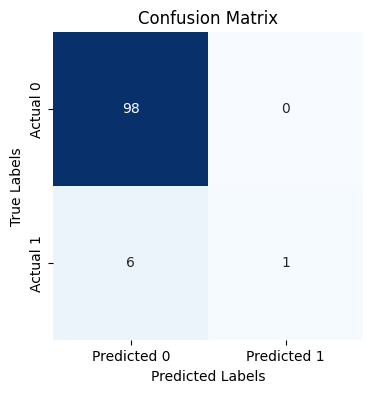

In [160]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 4.2. Logistic Regression with random over sampling

In [161]:
#train the model with cross validation on data_resampled and evaluate it on test set
X_train_2 = data_resampled[['x1','x2']]
y_train_2 = data_resampled['label']

In [162]:
model_2 = LogisticRegression()

In [167]:
cv_scores2 = cross_val_score(model_2, X_train_2, y_train_2, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores2)
print("Mean CV Score:", np.mean(cv_scores2))

# Fit the model on the full training set
model_2.fit(X_train_2, y_train_2)

# Evaluate the model on the test set
test_accuracy = model_2.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.9875  0.95625 0.9625  0.94375 0.95   ]
Mean CV Score: 0.96
Test Accuracy: 0.9428571428571428


## 4.3. Logistic regression with SMOTE

In [164]:
X_train_3 = data_smote[['x1','x2']]
y_train_3 = data_smote['label']

In [165]:
model_3 = LogisticRegression()

In [168]:
cv_scores3 = cross_val_score(model_3, X_train_3, y_train_3, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores3)
print("Mean CV Score:", np.mean(cv_scores3))

# Fit the model on the full training set
model_3.fit(X_train_3, y_train_3)

# Evaluate the model on the test set
test_accuracy = model_3.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.9875  0.95625 0.9625  0.94375 0.95   ]
Mean CV Score: 0.96
Test Accuracy: 0.9428571428571428


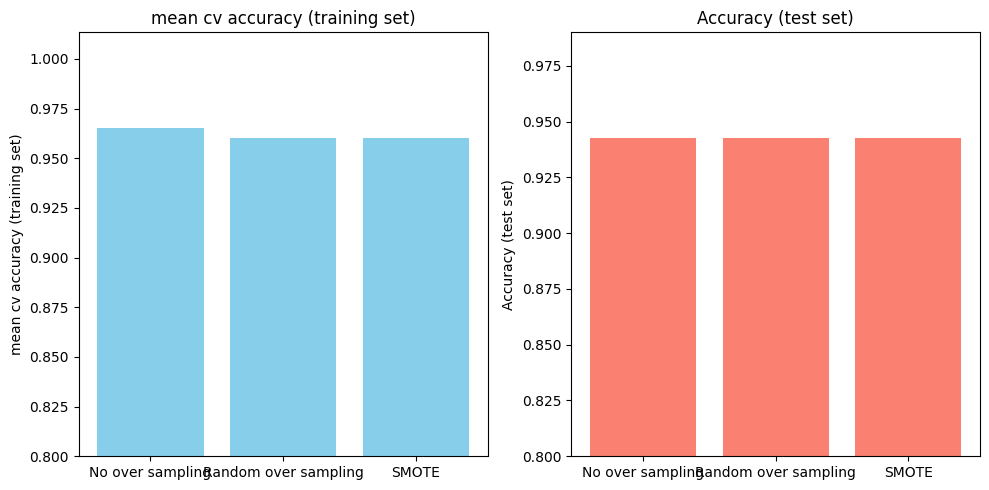

In [169]:
# Calculate variances
mean_cv = [np.mean(cv_scores), np.mean(cv_scores2), np.mean(cv_scores3)]
test_acc = [model.score(X_test, y_test), model_2.score(X_test, y_test), model_3.score(X_test, y_test)]

# Plotting
labels = ['No over sampling', 'Random over sampling', 'SMOTE']
x = np.arange(len(labels))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot for variance of x1
ax[0].bar(x, mean_cv, color='skyblue')
ax[0].set_ylabel('mean cv accuracy (training set)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_title('mean cv accuracy (training set)')
ax[0].set_ylim(bottom=0.8)  # Set lower limit of y-axis to 0

# Plot for variance of x2
ax[1].bar(x, test_acc, color='salmon')
ax[1].set_ylabel('Accuracy (test set)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_title('Accuracy (test set)')
ax[1].set_ylim(bottom=0.8)  # Set lower limit of y-axis to 0

plt.tight_layout()
plt.show()

We see that the model trained with SMOTE has a better performance than the model trained with and without random over sampling.

# 5. Boundary Decision
A nice visualization of the decision boundaries could help to see how SMOTE could be efficient.

## 5.1. No Over Sampling

In [170]:
sample_X = np.random.rand(100000,2)*10
sample_y = model.predict(sample_X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [171]:
sample_df = pd.DataFrame(sample_X, columns=['x1','x2'])
sample_df['label'] = sample_y

<Axes: xlabel='x1', ylabel='x2'>

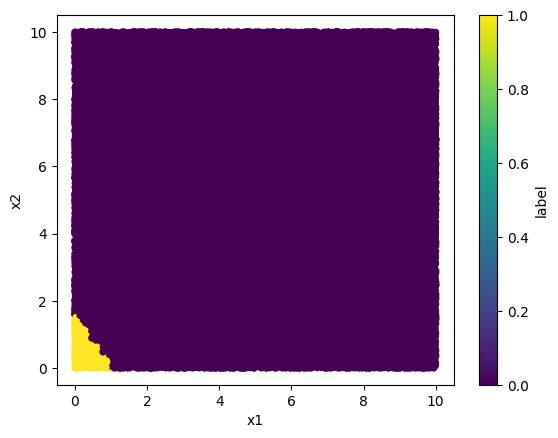

In [172]:
sample_df.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

## 5.2. Random Over Sampling

In [173]:
sample2_X = np.random.rand(100000,2)*10
sample2_y = model_2.predict(sample2_X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [174]:
#concat the samples and the predictions
sample_df2 = pd.DataFrame(sample2_X, columns=['x1','x2'])
sample_df2['label'] = sample2_y

<Axes: xlabel='x1', ylabel='x2'>

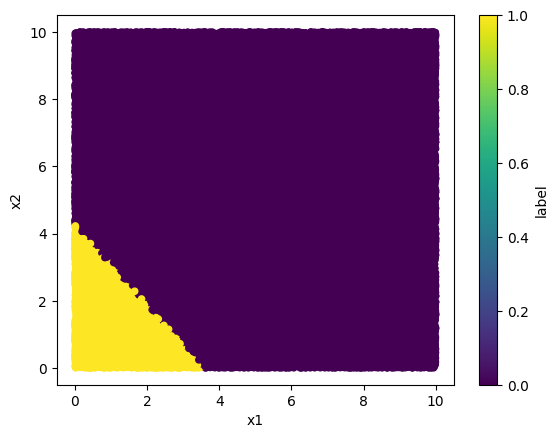

In [175]:
sample_df2.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

## 5.3. SMOTE

In [176]:
sample3_X = np.random.rand(100000,2)*10
sample3_y = model_3.predict(sample3_X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [177]:
sample_df3 = pd.DataFrame(sample3_X, columns=['x1','x2'])
sample_df3['label'] = sample3_y

/Users/hugorameil/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


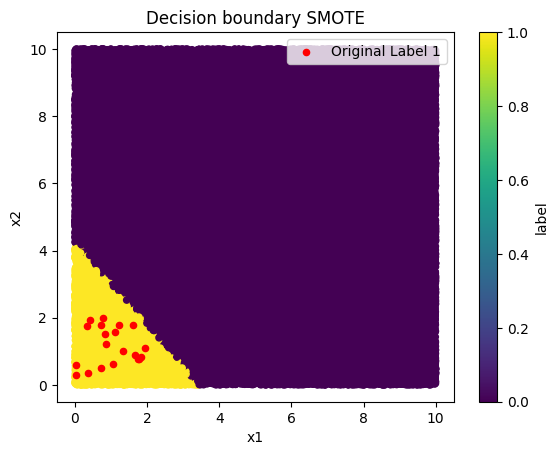

In [183]:
sample_df3.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

# Filter data DataFrame for points with label 1 and plot them
data[data['label'] == 1].plot.scatter(x='x1', y='x2', c='r', label='Original Label 1', ax=plt.gca())

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary SMOTE')
plt.legend()
plt.show()

/Users/hugorameil/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


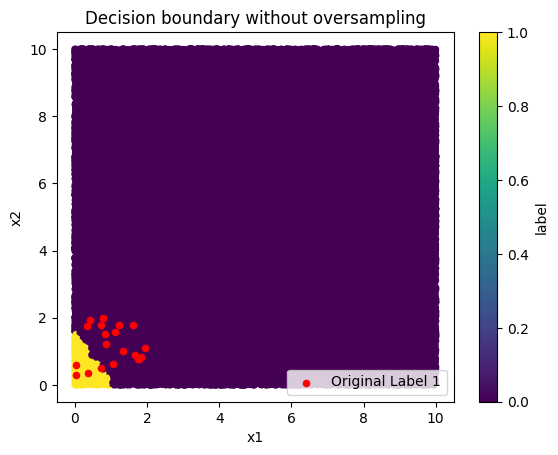

In [187]:
sample_df.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

# Filter data DataFrame for points with label 1 and plot them
data[data['label'] == 1].plot.scatter(x='x1', y='x2', c='r', label='Original Label 1', ax=plt.gca())

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary without oversampling')
plt.legend()
plt.show()

/Users/hugorameil/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


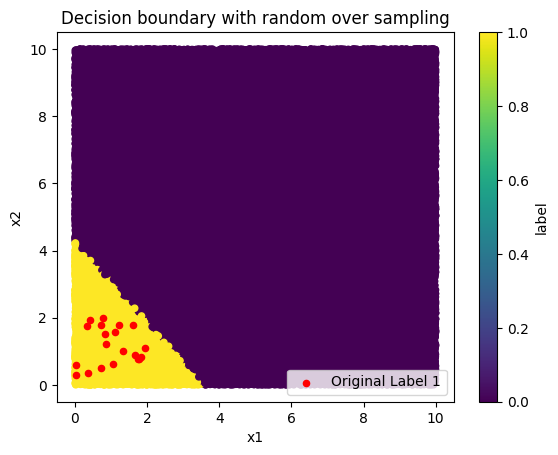

In [185]:
sample_df2.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

# Filter data DataFrame for points with label 1 and plot them
data[data['label'] == 1].plot.scatter(x='x1', y='x2', c='r', label='Original Label 1', ax=plt.gca())

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary with random over sampling')
plt.legend()
plt.show()

# Conclusion